### Exploratory Data Analysis 

Employee turnover is a key problem faced by many organizations. When good people leave, it usually costs the organization substantial time and other resources to find a replacement. Therefore, many organizations try to keep the churn rate at a low level. Imagine a company who now wants to understand its employee churn situation. Its HR (Human Resources) department gives you some data of their employees, and asks you to do exploratory data analysis and to predict employee churn.

You are free to choose any statistics library to analyze the data. In your answer, please include both the snippets of your code as well as the outputs.

Download the data `termination.csv` and `.ipynb` template from Canvas. Use the downloaded resources to answer the following questions:

#### a. (2 pts) Display a summary of the data (i.e. min, max, mean and quartiles for each variable). In the summary statistics, are there any meaningless quantities?

In [1]:
# Step 1: Load essential packages -- refer to recitation
import pandas as pd
import numpy as np

In [2]:
# Step 2: load data using read_csv function

In [2]:
df=pd.read_csv('termination.csv',sep=',')

In [3]:
# step 3: Invoke appropriate function on the loaded data to get the summary statistics

In [4]:
print(df.describe(include='all'))

          EmployeeID   recorddate_key birthdate_key orighiredate_key  \
count   49653.000000            49653         49653            49653   
unique           NaN              130          5342             4415   
top              NaN  12/31/2013 0:00    1954-08-04       2004-12-04   
freq             NaN             5215            40               50   
mean     4859.495740              NaN           NaN              NaN   
std      1826.571142              NaN           NaN              NaN   
min      1318.000000              NaN           NaN              NaN   
25%      3360.000000              NaN           NaN              NaN   
50%      5031.000000              NaN           NaN              NaN   
75%      6335.000000              NaN           NaN              NaN   
max      8336.000000              NaN           NaN              NaN   

       terminationdate_key           age  length_of_service  city_name  \
count                49653  49653.000000       49653.000000  

The statistical data(mean,std,etc.) of record_date_kyey, orighiredate_key.terminationdate_key, city_name,department_name, job_title, gender_short, gender_full, termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT are meaningless.

#### b. (5 pts) The data include 10 years (2006 - 2015) of records for both active and terminated employees. Status Year field shows the year of data, and Status field shows the employment status – ACTIVE or TERMINATED in the corresponding status year. The company is interested in what proportion of the staff are leaving. Compute: 1) the percent of terminated employees out of all employees for each year; 2) average termination rate over the 10 years?

In [5]:
# Step 1: Create a pivot_table indexing STATUS_YEAR and apply to STATUS column

In [6]:
pv_table=df.pivot_table(values='EmployeeID',index='STATUS_YEAR',columns='STATUS',aggfunc=len)
pv_table

STATUS,ACTIVE,TERMINATED
STATUS_YEAR,,
2006,4445,134
2007,4521,162
2008,4603,164
2009,4710,142
2010,4840,123
2011,4972,110
2012,5101,130
2013,5215,105
2014,4962,253


In [7]:
# Step 2: Based on the pivot_table, find total number of employees each year

In [8]:
n_of_employee_year=pv_table.sum(axis=1)
n_of_employee_year

STATUS_YEAR
2006    4579
2007    4683
2008    4767
2009    4852
2010    4963
2011    5082
2012    5231
2013    5320
2014    5215
2015    4961
dtype: int64

In [9]:
# Step 3: Now compute the percentage

In [10]:
pv_percent=pv_table['TERMINATED'].div(n_of_employee_year,axis=0)
pv_percent.apply(lambda x: format(x,'.4%'))

STATUS_YEAR
2006    2.9264%
2007    3.4593%
2008    3.4403%
2009    2.9266%
2010    2.4783%
2011    2.1645%
2012    2.4852%
2013    1.9737%
2014    4.8514%
2015    3.2655%
dtype: object

In [11]:
# Step 4: Invoke a function to compute average on the calculated percentage.

In [17]:
print('{:.4%}'.format(pv_percent.mean()))
print('*Note: here I use mean of the termination rates of ten years rather than directly use the termination number of ten years to compute')

2.9971%
*Note: here I use mean of the termination rates of ten years rather than directly use the termination number of ten years to compute


#### c.(5 pts) In addition to the proportion of terminated employees, the company wants to know more about different types of termination. Give a stacked bar chart of terminates, where x-axis is status year, y-axis is number of terminated employees, and different colors in a bar show different termination reasons (‘termreason desc’ field in the data). What do you observe in this plot?

In [ ]:
# Step 1: Filter dataframe for the relevant status for this question

In [118]:
filter_data=df[df['STATUS']=='TERMINATED'][['termreason_desc','STATUS_YEAR','STATUS']]
filter_data

,termreason_desc,STATUS_YEAR,STATUS
48168,Retirement,2010,TERMINATED
48169,Retirement,2011,TERMINATED
48170,Retirement,2006,TERMINATED
48171,Retirement,2011,TERMINATED
48172,Retirement,2012,TERMINATED
48173,Resignaton,2011,TERMINATED
48174,Resignaton,2012,TERMINATED
48175,Resignaton,2015,TERMINATED
48176,Resignaton,2011,TERMINATED
48177,Resignaton,2011,TERMINATED


In [53]:
# Step 2: Similar to part (b) create pivot table on column termreason_desc

In [132]:
filtert_pv=filter_data.pivot_table('STATUS',columns='termreason_desc',index='STATUS_YEAR',aggfunc=len)
filtert_pv

termreason_desc,Layoff,Resignaton,Retirement
STATUS_YEAR,,,
2006,NaN,12.0,122.0
2007,NaN,25.0,137.0
2008,NaN,26.0,138.0
2009,NaN,18.0,124.0
2010,NaN,29.0,94.0
2011,NaN,69.0,41.0
2012,NaN,76.0,54.0
2013,NaN,49.0,56.0
2014,142.0,55.0,56.0


In [57]:
# Step 3: Plot stacked bar chart using pandas plot bar function

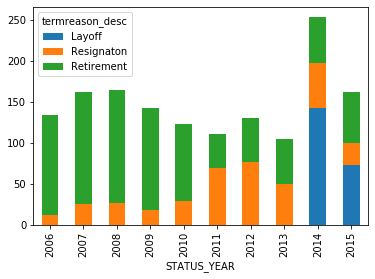

In [137]:
filtert_pv.plot.bar(stacked=True);

#### d. (3 pts) Does Age affect termination? Draw (2) Box-plots of Age for active and terminated employees separately. What does the box-plot tell you?

In [58]:
# Step 1: Use pandas boxplot for this part

In [147]:
data_box=df[['age','STATUS']]
data_box

,age,STATUS
0,52,ACTIVE
1,53,ACTIVE
2,54,ACTIVE
3,55,ACTIVE
4,56,ACTIVE
5,57,ACTIVE
6,58,ACTIVE
7,59,ACTIVE
8,60,ACTIVE
9,61,ACTIVE


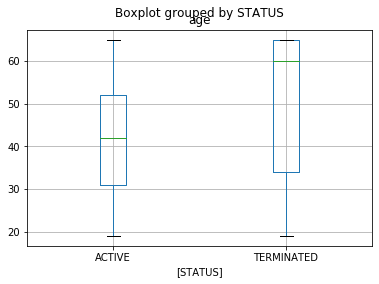

In [146]:
data_box.boxplot(column=['age'],by=['STATUS']);